# Create Maps of All Lock & Focal Lock Locations
# _Factors affecting vessel delays at US Army Corps of Engineers-managed locks on US waterways._

## Springboard Data Science Career Track, Capstone 2
***
* Author: Heather A. Passmore
* Data: United States Army Corps of Engineers, Lock Performance Management System
* Capstone Description: [Project Proposal](https://github.com/PassMoreHeat/springboard/blob/master/Capstone_2/ProjectProposalCap2.md)
* Initial Data Approach: [Data Wrangling Report](https://github.com/PassMoreHeat/springboard/blob/master/Capstone_2/Data_Wrangling_Report.md)
* Milestone Report
* Final Report
***

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import pickle
from uszipcode import ZipcodeSearchEngine

#%matplotlib inline

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

In [3]:
lock_locations = pd.read_csv('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/Lock_Locations.csv', 
                    index_col=None, header = 0)
lock_locations.head()

,EROC,RIVER_CODE,LOCK_NO,LATITUDE,LONGITUDE
0,B5,MI,12,42.260540,-90.422532
1,B5,IL,7,40.632094,-89.624700
2,H3,TN,2,35.065679,-88.249769
3,H5,BR,1,42.934580,-78.906396
4,B5,IL,2,41.568595,-88.077390


## Build map of all Lock Locations

In [4]:
# assign lat and long to variables
lat = lock_locations['LATITUDE'].values
lon = lock_locations['LONGITUDE'].values

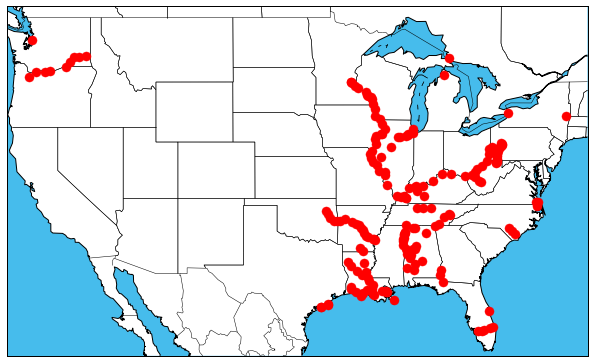

In [5]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'l',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()

## Build Map of Ten Focal Locks

In [6]:
# Bring ten_locations dataframe into workspace
# load the pickled ten_locations DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/ten_locations.pickle','rb') as f:
    ten_locations = pickle.load(f)

In [7]:
# Check dataframe
ten_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 17 to 163
Data columns (total 6 columns):
EROC          10 non-null object
RIVER_CODE    10 non-null object
LOCK_NO       10 non-null int64
LATITUDE      10 non-null float64
LONGITUDE     10 non-null float64
E_R_L         10 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 560.0+ bytes


In [8]:
# assign lat and long to variables
lat2 = ten_locations['LATITUDE'].values
lon2 = ten_locations['LONGITUDE'].values

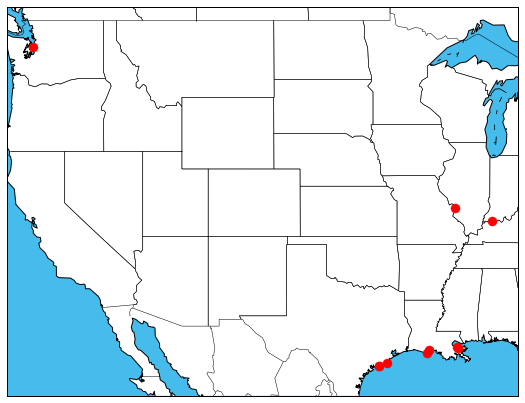

In [9]:
# determine range to print based on min, max lat and lon of the data
margin2 = 2 # buffer to add to the range
lat_min2 = min(lat2) - margin2
lat_max2 = max(lat2) + margin2
lon_min2 = min(lon2) - margin2
lon_max2 = max(lon2) + margin2

# create map using BASEMAP
m2 = Basemap(llcrnrlon=lon_min2,
            llcrnrlat=lat_min2,
            urcrnrlon=lon_max2,
            urcrnrlat=lat_max2,
            lat_0=(lat_max2 - lat_min2)/2,
            lon_0=(lon_max2-lon_min2)/2,
            projection='merc',
            resolution = 'l',
            area_thresh=10000.,
            )
m2.drawcoastlines()
m2.drawcountries()
m2.drawstates()
m2.drawmapboundary(fill_color='#46bcec')
m2.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m2(lon2, lat2)
# plot points as red dots
m2.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()

## Modify Focal Lock Map to show all US area and different color markers

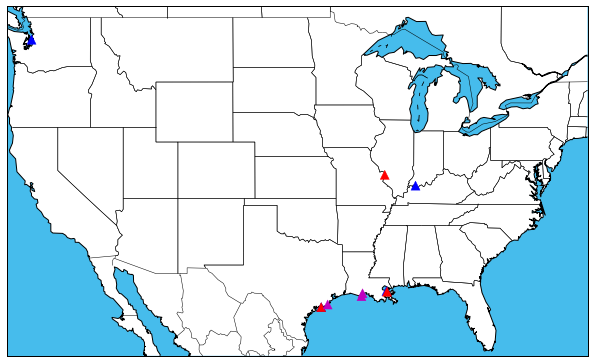

In [11]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m2 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'l',
            area_thresh=10000.,
            )
m2.drawcoastlines()
m2.drawcountries()
m2.drawstates()
m2.drawmapboundary(fill_color='#46bcec')
m2.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m2(lon2, lat2)
# plot points as red dots
m2.scatter(lons, lats, marker = '^', color=['b','r','m','b','r','m','b','r','m','b'], zorder=5)
plt.show()